## 1. 正则化 - 脊回归 Ridge Regression：

预测函数：
$$
y = \mathbf{w}^\top \mathbf{X}
$$
脊回归目标函数**（加正则项 regularisation term）**：
$$ 
J(\mathbf{w}, \alpha) = \frac{1}{n}\sum_{i=1}^n (y_i - f(\mathbf{x}_i))^2 + \lambda \sum_{j=0}^D w_j^2.
$$

最小二乘法（normal equation）形式：

$$ 
\mathbf{w} = (\mathbf{X}^{\top}\mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^{\top}\mathbf{y}. 
$$

**正则项可以解决矩阵不可逆的情况并且可以防止过拟合。**

## 2. 基函数 linear in parameters, non-linear in input：

1. Quadratic Basis：
$$\phi = [x^0, x^1, x^2]$$

2. Radical Basis Functions 径向基函数：
$$\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{2\ell^2}\right)$$

3. Fourier Basis Functions 傅立叶基函数：

4. RELU 

**首先，通过negative log likelihood 推导出 loss function，然后使用最小二乘法求 w。**

**注意: $x_i$代表的是第 i 个样本，$\phi_i$代表的是第i个样本在某一基函数下的表达形式，每个样本是由1个特征值组成，通过基函数，将这一个特征值扩展到m个，数据集一共包含n个样本。**

## 1. Negative Log likelihood:

$$p\left(y_i|\mathbf{x}_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}\right).$$
        
        
其中 $f(\mathbf{x}_i) = \mathbf{w}^\top \boldsymbol{\phi}_i$，
$
\begin{align*}
    \boldsymbol{\phi}_i =
                \begin{bmatrix}
                    \phi_0(\mathbf{x}_i)\\
                    \phi_1(\mathbf{x}_i)\\
                    \vdots\\
                    \phi_m(\mathbf{x}_i)
                \end{bmatrix}.
\end{align*}
$   

\begin{align*}
   p(\mathbf{y}|\mathbf{X})&= \prod_{i=1}^n p(y_i|\mathbf{x}_i)\\
   p(\mathbf{y}|\mathbf{X})&= \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-  
                              \frac{\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}\right)\\
   p(\mathbf{y}|\mathbf{X})&= \frac{1}{\left(2\pi \sigma^2\right)^{\frac{n}{2}}}\exp\left(-
                               \frac{\sum_{i=1}^n\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}} 
                                      {2\sigma^2}\right).
 \end{align*}
 
其中 $\mathbf{X}$ 为全部数据。

等式取log：
$$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$
            
取负号，去掉常数：
$$E(\mathbf{w},\sigma^2)= \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$
            
展开括号：
$$ E(\mathbf{w}, \sigma^2) =  -\frac{1}{\sigma^2}\mathbf{w}^\top\sum_{i=1}^{n}\boldsymbol{\phi}_i y_i +\frac{1}{2\sigma^2} \mathbf{w}^{\top}\left[\sum_{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\right]\mathbf{w}.$$

## 2. 最小二乘法：

对$\mathbf{w}$求导并等于0 (**注意矩阵求导**):
$$\frac{\text{d} E\left(\mathbf{w},\sigma^2 \right)}{\text{d} \mathbf{w}}=-\frac{1}{\sigma^2} \sum _{i=1}^{n}\boldsymbol{\phi}_iy_i+\frac{1}{\sigma^2} \left[\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\right]\mathbf{w} = 0$$

$$\mathbf{w}=\left[\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\right]^{-1}\sum _{i=1}^{n}\boldsymbol{\phi}_iy_i.$$

将表达式写成矩阵形式**QR分解**：
$$\mathbf{w} = \left(\boldsymbol{\Phi}^\top \boldsymbol{\Phi}\right)^{-1} \boldsymbol{\Phi}^\top \mathbf{y}.$$

其中

$\boldsymbol{\Phi}^\top = 
            \begin{bmatrix} 
                \phi_0(x_1) & \phi_0(x_2) & \cdots & \phi_0(x_n)\\
                \phi_1(x_1) & \phi_1(x_2) & \cdots & \phi_1(x_n)\\
                \vdots \\
                \phi_m(x_1) & \phi_m(x_2) & \cdots & \phi_m(x_n)\\
             \end{bmatrix} 
$ = 
$
  \begin{bmatrix}
      \boldsymbol{\phi_1}\; \boldsymbol{\phi_2}\; \cdots \; \boldsymbol{\phi_n}\\               
  \end{bmatrix}
$
.


$\boldsymbol{\Phi} = 
            \begin{bmatrix} 
                \phi_0(x_1) & \phi_1(x_1) & \cdots & \phi_m(x_1)\\
                \phi_0(x_2) & \phi_1(x_2) & \cdots & \phi_m(x_2)\\
                \vdots \\
                \phi_0(x_n) & \phi_1(x_n) & \cdots & \phi_m(x_n)\\
             \end{bmatrix} 
$ = 
$
                \begin{bmatrix}
                    \boldsymbol{\phi}^{\top}_1\\
                    \boldsymbol{\phi}^{\top}_2\\
                    \vdots\\
                    \boldsymbol{\phi}^{\top}_n
                \end{bmatrix}
$.


$ 
\boldsymbol{\Phi}^\top\boldsymbol{\Phi} = \sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}
$

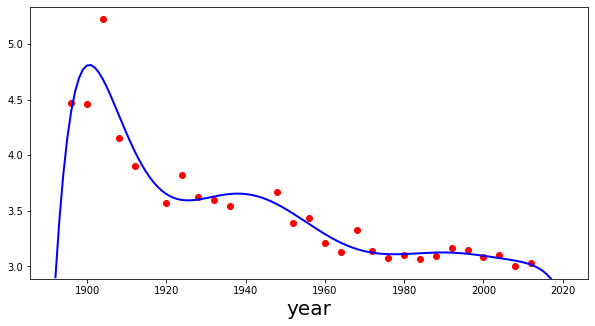

In [3]:
import pods
import mlai
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp
import teaching_plots as plot
%matplotlib inline

basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()
#f, ax = plt.subplots(1, 2, figsize=(10,5))
f, ax = plt.subplots(figsize=(10,5))
x = data['X']
y = data['Y']

data_limits = [1892, 2020]
max_basis = 10

ll = np.array([np.nan]*(max_basis))
sum_squares = np.array([np.nan]*(max_basis))

for num_basis in range(1,max_basis):
    model = mlai.LM(x, y, basis, num_basis=num_basis, data_limits=data_limits)
    model.fit()
    sum_squares[num_basis-1] = model.objective() 
    ll[num_basis-1] = model.log_likelihood()   
    plot.marathon_fit(model=model, value = num_basis, param_name='', param_range=(1, max_basis+1), 
                      xlim= data_limits, objective_ylim=[0,8],
                      title='Root Mean Square Training Error',
                      fig=f, ax=ax)
    

In [24]:
import numpy as np

# return design matrix.
def quadratic(x):
    return np.hstack([np.ones((x.shape[0], 1)), x, x**2])

def polynomial(x, num_basis):
    Phi = np.ones((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = x**i # i:i+1 rather than i.
    return Phi

def radical(x, num_basis, limit):
    if num_basis > 1:
        centers = np.linspace(limit[0], limit[1], num_basis)
        width = (centers[1] - centers[0])/2
    else: 
        centres = np.asarray([data_limits[0]/2. + data_limits[1]/2.]) # asarray(): when original datatype is ndarry, asarray() will not copy original data. that is to say, original data change , asarray() change. 
        width = (data_limits[1]-data_limits[0])/2.
    Phi = np.zeros((x.shape[0], num_basis))
    for i in range(num_basis):
        Phi[:, i:i+1] = np.exp(-((x - centers[i])/width)**2)
    return Phi

def fourier(x, num_basis, limit):
    span = limit[1] - limit[0]
    Phi = np.ones((x.shape[0], num_basis))
    for i in range(num_basis):
        count = (i+1)//2
        frequency = count/span
        if i % 2:
            Phi[:, i:i+1] = np.sin(2*np.pi*frequency*x)
        else:
            Phi[:, i:i+1] = np.cos(2*np.pi*frequency*x)
    return Phi

def relu(x, num_basis, limit):
    if num_basis > 2:
        centers = np.linspace(limit[0], limit[1], num_basis)
    else:
        centers = np.asarray([(limit[0]+limit[1])/2])
    if gain is None:
        gain = np.ones(num_basis-1)
        
    Phi = np.ones((x.shape[0], num_basis))
    for i in range(1, num_basis):
        Phi[:, i:i+1] = (gain[i-1]*x>centres[i-1])*(x-centres[i-1])
    return Phi
    
x = np.ones((20, 1))
x[:, 0] = np.linspace(-1, 1, 20)
Phi = fourier(x, 4, [-1, 1])

**注意：只要是能写成$f(x) = w^T\phi(x)$，就代表参数是线性。**